In [36]:
import numpy as np
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
#constants and their upper/lower uncertainty

theta12=33.82
theta23=48.3
theta13=8.61
delta=np.radians(222)
mass12=7.39*(10**(-5))
mass23=2.523*(10**(-3))
mass13=2.523*(10**(-3))

In [3]:
#useful calculations

c12=np.cos(np.radians(theta12))
c23=np.cos(np.radians(theta12))
c13=np.cos(np.radians(theta12))

s12=np.sin(np.radians(theta12))
s23=np.sin(np.radians(theta12))
s13=np.sin(np.radians(theta12))

i=complex(0,-1)

In [4]:
#rotation matrix
#first row represents the elctron neutrino state
#second row represents the muon neutrino state
#third row represents the tau neutrino state

A=np.array([[1,0,0],[0,c23,s23],[0,-s23,c23]])
B=np.array([[c13,0,s13*np.exp(-i*delta)],[0,1,0],[-s13*np.exp(i*delta),0,c13]])
C=[[c12,s12,0],[s12,c12,0],[0,0,1]]
U=np.matmul(np.matmul(A,B),C)

print(U)

[[ 0.69021241+0.j          0.46240592+0.j         -0.41362375-0.37242849j]
 [ 0.65366799-0.17221314j  0.81834792-0.11537372j  0.46240592+0.j        ]
 [-0.02429934-0.25705477j -0.27114385-0.17221314j  0.69021241+0.j        ]]


In [5]:
def masssqrd(alpha,beta):
    '''gives the correct value of mass difference squared'''
    if alpha==1 and beta==2:
        return mass12
    if alpha==2 and beta==3:
        return mass23
    if alpha==1 and beta==3:
        return mass13
    else:
        return 0

def prob(alpha,beta,E,L):
    '''probability of neutrino oscillation from state alpha to state beta
    against distance travalled L (for ultrarelativistics neutrinos t=L)
    alpha and beta represent the neutrino eigenstates
    1: electron
    2: muon
    3: tau
    E: energy of the neutrino'''
    
    alpha=alpha-1
    beta=beta-1
    sum=0
    for j in range (0,3):
        for k in range (0,3):
            V=np.conj(U[alpha][k])*(U[beta][k])*(U[alpha][j])*np.conj(U[beta][j])
            M=np.exp(-i*(L*masssqrd(j+1,k+1)/(2*E)))
            sum+=V*M
    return abs(sum)

<IPython.core.display.Javascript object>


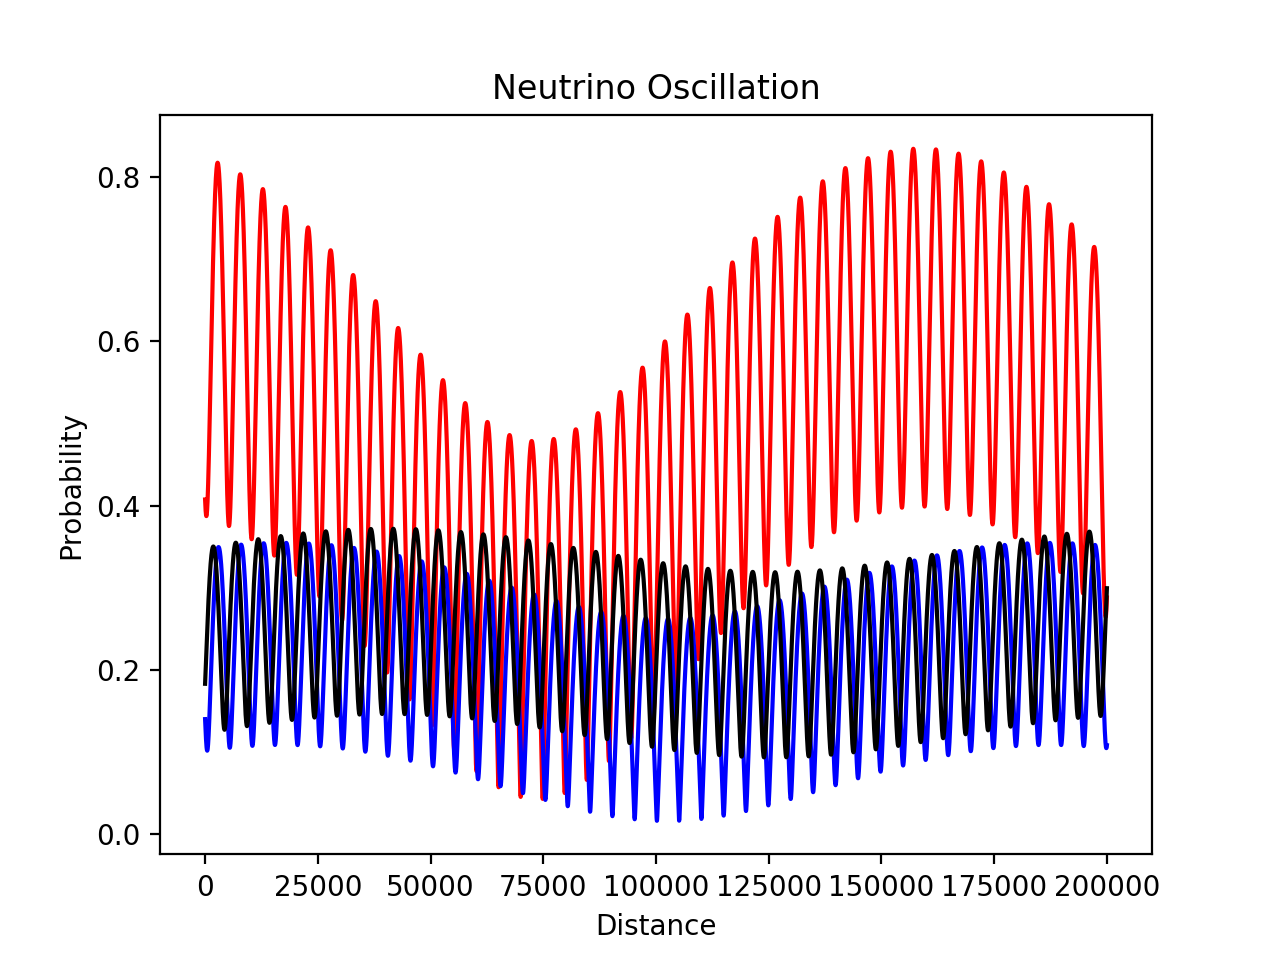

In [6]:
xpoints=np.linspace(0,200000,100000)
E=1

plt.figure()
plt.plot(xpoints,prob(1,2,E,xpoints),'r-')
plt.plot(xpoints,prob(2,3,E,xpoints),'b-')
plt.plot(xpoints,prob(1,3,E,xpoints),'k-')
plt.title("Neutrino Oscillation")
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.show();

In [7]:
e=prob(1,2,E,20000)
f=prob(2,3,E,20000)
g=prob(1,3,E,20000)

print (e,f,g)
print(e+f+g)

0.3505109991566305 0.15128263622997942 0.20403002018667712
0.7058236555732871


# ------------------------ Computational simulation -----------------------------

In [73]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)

# mass differences
dm21_sq = 7.53*10**(-5) # eV^2
dm32_sq = 2.52*10**(-3) # eV^2

# mass eigenstates
m1 = 0.75 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m2*m2 + dm32_sq) # eV

#calculate third mass difference squared
dm31_sq = m3*m3 - m1*m1 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
# note: add energy values from other reactions, e.g. atmospheric, nuclear reactor

# important constants:
# speed of light
c = 299792.458 # km s^-1 
# Planck constant
hbar = 6.582119569*10**(-16) # eV*s
# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

In [65]:
def prob_transition(alpha, beta, E, L):
    """Calculates the probability of a transition between an initial neutrino alpha to a neutrino beta
    Takes as inputs the initial and final neutrino flavours alpha and beta, 
    the energy at which the neutrino is produced E (in eV),
    and the distance travelled by the particle L (in km)
    Returns the probability of the transition"""
    
    if (alpha == "electron" and beta == "muon") or (alpha == "muon" and beta == "electron"): 
        ar = np.array([th12, dm21_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == "electron" and beta == "tau") or (alpha == "tau" and beta == "electron"):
        ar = np.array([th13, dm31_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == "muon" and beta == "tau") or (alpha == "tau" and beta == "muon"):
        ar = np.array([th23, dm32_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == beta):
        
        if (alpha == "electron"):
            ar1 = np.array([th12, dm21_sq])
            ar2 = np.array([th13, dm31_sq])
            
        elif (alpha == "muon"):
            ar1 = np.array([th12, dm21_sq])
            ar2 = np.array([th23, dm32_sq])
            
        elif (alpha == "tau"):
            ar1 = np.array([th13, dm31_sq])
            ar2 = np.array([th23, dm32_sq])
        
        arg1 = 1.27*ar1[1]*L/E
        arg2 = 1.27*ar2[1]*L/E
        
        P1 = np.sin(2*ar1[0])*np.sin(2*ar1[0])*np.sin(arg1)*np.sin(arg1)
        P2 = np.sin(2*ar2[0])*np.sin(2*ar2[0])*np.sin(arg2)*np.sin(arg2)
        
        P = 1 - (P1 + P2)
    
    else:
        return "Error"
    
    return P

<IPython.core.display.Javascript object>


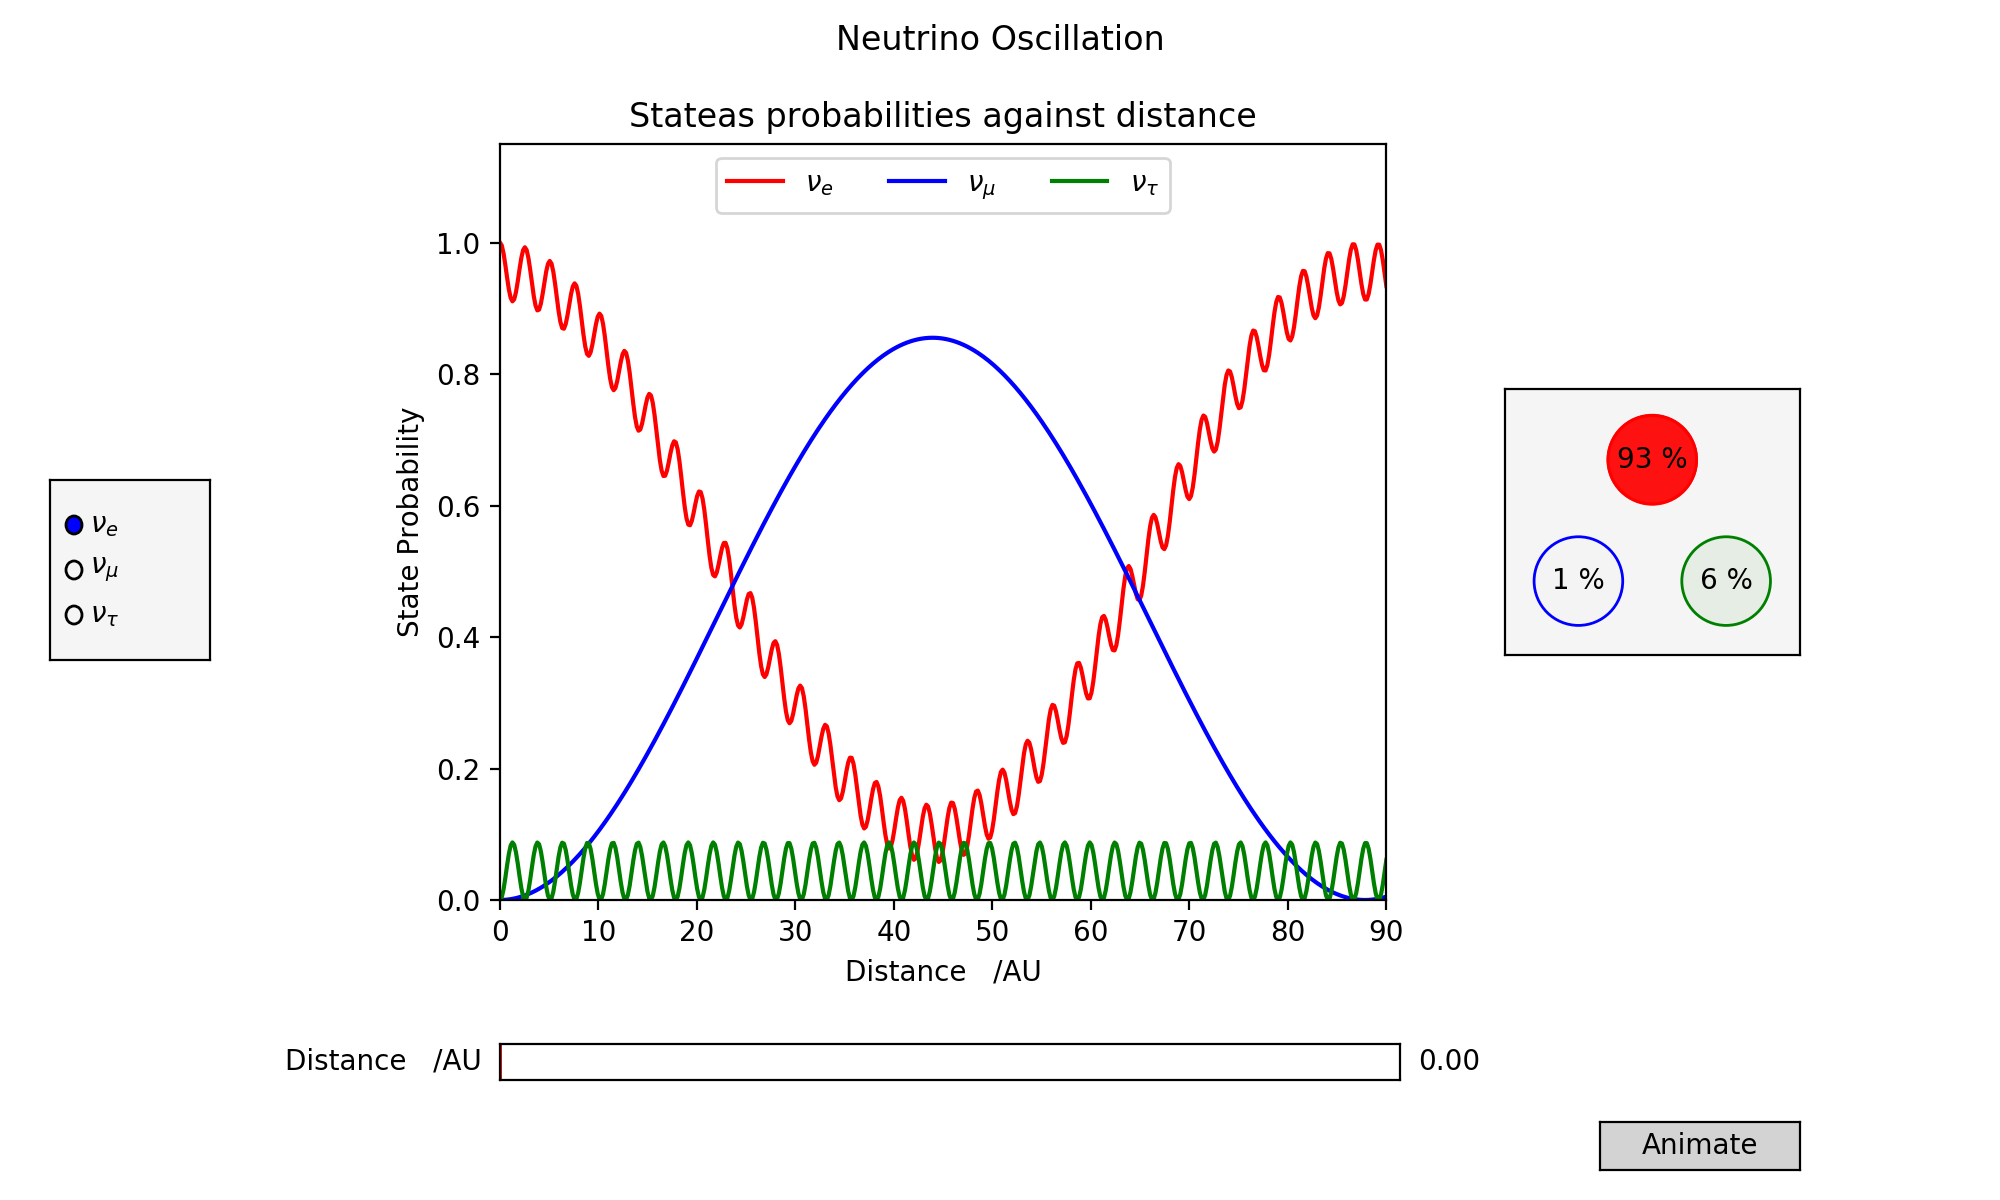

In [72]:
#create plot and set limits
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6),gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(left=0.25, bottom=0.25)

ax1.set_xlim(0, 90)
ax1.set_ylim(0, 1.15)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.9)
ax2.set_aspect('equal')
ax2.set_facecolor('whitesmoke')

#draw lines, circles
blackline, = ax1.plot([],[],'k--')

xdata, ydata1, ydata2, ydata3 = [], [], [], []
line1, = ax1.plot([], [], 'r-',label="$ν_{e}$")
line2, = ax1.plot([], [], 'b-',label="$ν_{\mu}$")
line3, = ax1.plot([], [], 'g-',label="$ν_{τ}$")

circle1 = plt.Circle((0.5, 0.66), radius=0.15, color='r')
circle2 = plt.Circle((0.25, 0.25), radius=0.15, color='b')
circle3 = plt.Circle((0.75, 0.25), radius=0.15, color='g')
border1 = plt.Circle((0.5, 0.6614378277661477), radius=0.15, edgecolor='r',facecolor='none')
border2 = plt.Circle((0.25, 0.25), radius=0.15, edgecolor='b',facecolor='none')
border3 = plt.Circle((0.75, 0.25), radius=0.15, edgecolor='g',facecolor='none')

ax2.add_artist(circle1)
ax2.add_artist(circle2)
ax2.add_artist(circle3)
ax2.add_artist(border1)
ax2.add_artist(border2)
ax2.add_artist(border3)

# Text
text1=ax2.text(0.5, 0.66,"",horizontalalignment='center', verticalalignment='center')
text2=ax2.text(0.25, 0.25,"",horizontalalignment='center', verticalalignment='center')
text3=ax2.text(0.75, 0.25,"",horizontalalignment='center', verticalalignment='center')

# Plot
fig.suptitle('Neutrino Oscillation')

ax1.set_title("Stateas probabilities against distance")
ax1.set_xlabel("Distance   /AU")
ax1.set_ylabel("State Probability")
ax1.legend(ncol = 3,loc = 9)

ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#flavor box
color = "grey"
rax = plt.axes([0.025, 0.45, 0.08, 0.15],facecolor = 'whitesmoke')
radio = RadioButtons(rax, ("$ν_{e}$", "$ν_{\mu}$", "$ν_{τ}$"))

#default initial flavour
alpha = "electron"

# Function to be called when selecting different initial flavour
def flavor(label):
    flavor_options = {"$ν_{e}$":"electron","$ν_{\mu}$":"muon","$ν_{τ}$":"tau"}
    alpha = flavor_options[label]
    
radio.on_clicked(flavor)

# Probabilities
def y1(x):
    return prob_transition(alpha, "electron", E_sun_pp, x*AU)

def y2(x):
    return prob_transition(alpha, "muon", E_sun_pp, x*AU)

def y3(x):
    return prob_transition(alpha, "tau", E_sun_pp, x*AU)
    

#initial animation
def animate(frame):
    
    xdata.append(frame)
    ydata1.append(y1(frame))
    ydata2.append(y2(frame))
    ydata3.append(y3(frame))
    
    line1.set_data(xdata,ydata1)
    line2.set_data(xdata,ydata2)
    line3.set_data(xdata,ydata3)
    
    circle1.set_alpha(y1(frame))
    circle2.set_alpha(y2(frame))
    circle3.set_alpha(y3(frame))
    
    text1.set_text(str("{0:.0f}".format(y1(frame)*100) + " %"))
    text2.set_text(str("{0:.0f}".format(y2(frame)*100) + " %"))
    text3.set_text(str("{0:.0f}".format(y3(frame)*100) + " %"))
    
    return line1, line2, line3

ani = FuncAnimation(fig, animate, frames=np.linspace(0, 90, 500),blit=True,repeat=False, interval=5)


#update slider
d0=0
delta_d=0.1
axdistance=plt.axes([0.25, 0.1, 0.45, 0.03])
Dslider = Slider(axdistance, 'Distance   /AU', 0, 90,color='gray', valinit=d0, valstep=delta_d)
 
def update(val):
    
    d = Dslider.val
    
    blackline.set_xdata(np.linspace(d,d,1000))
    blackline.set_ydata(np.linspace(0,1.15,1000))
    
    circle1.set_alpha(y1(d))
    circle2.set_alpha(y2(d))
    circle3.set_alpha(y3(d))
    
    text1.set_text(str("{0:.0f}".format(y1(d)*100) + " %"))
    text2.set_text(str("{0:.0f}".format(y2(d)*100) + " %"))
    text3.set_text(str("{0:.0f}".format(y3(d)*100) + " %"))
        
Dslider.on_changed(update)

#Animate button display
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Animate', color='lightgray',hovercolor="white")

#Animate event
def anim(event):
    Dslider.reset()
    xdata.clear()
    ydata1.clear()
    ydata2.clear()
    ydata3.clear()
    plt.draw()
    return FuncAnimation
    
button.on_clicked(anim);


#def colorfunc(label):
#    l.set_color(label)
#    fig.canvas.draw_idle()
#radio.on_clicked(colorfunc)